<a href="https://colab.research.google.com/github/santule/ERA/blob/main/S9/Session9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
%cd /content/drive/MyDrive/AI/ERA/session9

Mounted at /content/drive/
/content/drive/MyDrive/AI/ERA/session9


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import model
import utils
import dataloader
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.optim.lr_scheduler import StepLR, OneCycleLR

###### 1 - LOAD DATA

In [3]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
train_loader,test_loader = dataloader.load_dataset()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


###### 2 - CHECK THE MODEL

In [4]:
model_check = model.Net().to(device)
utils.summarise_model(model_check)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]             576
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
            Conv2d-8           [-1, 64, 32, 32]           4,096
              ReLU-9           [-1, 64, 32, 32]               0
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
             ReLU-13           [-1, 64, 16, 16]               0
      BatchNorm2d-14           [-1, 64,

###### 3 - TRAIN THE MODEL

In [5]:
train_losses = []
test_losses = []
train_acc_list = []
test_acc_list = []

optimizer = optim.SGD(model_check.parameters(), lr=0.01, momentum=0.9)
#scheduler = OneCycleLR(optimizer, max_lr=0.5, epochs=60, steps_per_epoch=len(train_loader),verbose = True)

EPOCHS = 80
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss,train_acc = utils.train(model_check, device, train_loader, optimizer, epoch)
    train_losses.append(train_loss)
    train_acc_list.append(train_acc)
    #scheduler.step()


    test_loss,test_acc = utils.test(model_check, device, test_loader)
    test_losses.append(test_loss)
    test_acc_list.append(test_acc)

EPOCH: 0


100%|██████████| 391/391 [00:12<00:00, 31.40it/s]

Training set set: Average loss: 1.8568, Accuracy: 14879/50000 (29.76%)



Test set: Average loss: 1.5729, Accuracy: 4092/10000 (40.92%)

EPOCH: 1


100%|██████████| 391/391 [00:12<00:00, 31.36it/s]

Training set set: Average loss: 1.5880, Accuracy: 20497/50000 (40.99%)



Test set: Average loss: 1.3663, Accuracy: 4977/10000 (49.77%)

EPOCH: 2


100%|██████████| 391/391 [00:12<00:00, 31.24it/s]

Training set set: Average loss: 1.4607, Accuracy: 23189/50000 (46.38%)



Test set: Average loss: 1.2610, Accuracy: 5388/10000 (53.88%)

EPOCH: 3


100%|██████████| 391/391 [00:12<00:00, 31.69it/s]

Training set set: Average loss: 1.3789, Accuracy: 24883/50000 (49.77%)



Test set: Average loss: 1.1261, Accuracy: 5902/10000 (59.02%)

EPOCH: 4


100%|██████████| 391/391 [00:12<00:00, 31.80it/s]

Training set set: Average loss: 1.3008, Accuracy: 26478/50000 (52.96%)



Test set: Average loss: 1.0841, Accuracy: 6111/10000 (61.11%)

EPOCH: 5


100%|██████████| 391/391 [00:12<00:00, 31.98it/s]

Training set set: Average loss: 1.2394, Accuracy: 27673/50000 (55.35%)



Test set: Average loss: 1.0156, Accuracy: 6360/10000 (63.60%)

EPOCH: 6


100%|██████████| 391/391 [00:12<00:00, 31.99it/s]

Training set set: Average loss: 1.1891, Accuracy: 28632/50000 (57.26%)



Test set: Average loss: 1.0320, Accuracy: 6349/10000 (63.49%)

EPOCH: 7


100%|██████████| 391/391 [00:12<00:00, 31.83it/s]

Training set set: Average loss: 1.1402, Accuracy: 29686/50000 (59.37%)



Test set: Average loss: 0.8859, Accuracy: 6845/10000 (68.45%)

EPOCH: 8


100%|██████████| 391/391 [00:12<00:00, 31.71it/s]

Training set set: Average loss: 1.1050, Accuracy: 30321/50000 (60.64%)



Test set: Average loss: 0.8556, Accuracy: 6962/10000 (69.62%)

EPOCH: 9


100%|██████████| 391/391 [00:12<00:00, 31.69it/s]

Training set set: Average loss: 1.0676, Accuracy: 30991/50000 (61.98%)



Test set: Average loss: 0.8098, Accuracy: 7124/10000 (71.24%)

EPOCH: 10


100%|██████████| 391/391 [00:12<00:00, 31.86it/s]

Training set set: Average loss: 1.0363, Accuracy: 31502/50000 (63.00%)



Test set: Average loss: 0.7785, Accuracy: 7181/10000 (71.81%)

EPOCH: 11


100%|██████████| 391/391 [00:12<00:00, 31.76it/s]

Training set set: Average loss: 1.0096, Accuracy: 32120/50000 (64.24%)



Test set: Average loss: 0.7636, Accuracy: 7311/10000 (73.11%)

EPOCH: 12


100%|██████████| 391/391 [00:12<00:00, 31.79it/s]

Training set set: Average loss: 0.9839, Accuracy: 32726/50000 (65.45%)



Test set: Average loss: 0.7343, Accuracy: 7439/10000 (74.39%)

EPOCH: 13


100%|██████████| 391/391 [00:12<00:00, 31.90it/s]

Training set set: Average loss: 0.9601, Accuracy: 32937/50000 (65.87%)



Test set: Average loss: 0.6959, Accuracy: 7587/10000 (75.87%)

EPOCH: 14


100%|██████████| 391/391 [00:12<00:00, 31.83it/s]

Training set set: Average loss: 0.9440, Accuracy: 33363/50000 (66.73%)



Test set: Average loss: 0.6914, Accuracy: 7595/10000 (75.95%)

EPOCH: 15


100%|██████████| 391/391 [00:12<00:00, 31.89it/s]

Training set set: Average loss: 0.9211, Accuracy: 33687/50000 (67.37%)



Test set: Average loss: 0.6767, Accuracy: 7684/10000 (76.84%)

EPOCH: 16


100%|██████████| 391/391 [00:12<00:00, 31.79it/s]

Training set set: Average loss: 0.9122, Accuracy: 33959/50000 (67.92%)



Test set: Average loss: 0.6408, Accuracy: 7820/10000 (78.20%)

EPOCH: 17


100%|██████████| 391/391 [00:12<00:00, 31.79it/s]

Training set set: Average loss: 0.8914, Accuracy: 34410/50000 (68.82%)



Test set: Average loss: 0.6322, Accuracy: 7824/10000 (78.24%)

EPOCH: 18


100%|██████████| 391/391 [00:12<00:00, 31.76it/s]

Training set set: Average loss: 0.8767, Accuracy: 34669/50000 (69.34%)



Test set: Average loss: 0.6239, Accuracy: 7852/10000 (78.52%)

EPOCH: 19


100%|██████████| 391/391 [00:12<00:00, 31.81it/s]

Training set set: Average loss: 0.8622, Accuracy: 34910/50000 (69.82%)



Test set: Average loss: 0.6061, Accuracy: 7919/10000 (79.19%)

EPOCH: 20


100%|██████████| 391/391 [00:12<00:00, 31.79it/s]

Training set set: Average loss: 0.8455, Accuracy: 35131/50000 (70.26%)



Test set: Average loss: 0.6190, Accuracy: 7923/10000 (79.23%)

EPOCH: 21


100%|██████████| 391/391 [00:12<00:00, 31.80it/s]

Training set set: Average loss: 0.8411, Accuracy: 35280/50000 (70.56%)



Test set: Average loss: 0.5979, Accuracy: 7918/10000 (79.18%)

EPOCH: 22


100%|██████████| 391/391 [00:12<00:00, 31.70it/s]

Training set set: Average loss: 0.8324, Accuracy: 35424/50000 (70.85%)



Test set: Average loss: 0.5805, Accuracy: 8001/10000 (80.01%)

EPOCH: 23


100%|██████████| 391/391 [00:12<00:00, 31.67it/s]

Training set set: Average loss: 0.8152, Accuracy: 35658/50000 (71.32%)



Test set: Average loss: 0.5836, Accuracy: 8031/10000 (80.31%)

EPOCH: 24


100%|██████████| 391/391 [00:12<00:00, 31.61it/s]

Training set set: Average loss: 0.8066, Accuracy: 35892/50000 (71.78%)



Test set: Average loss: 0.5655, Accuracy: 8044/10000 (80.44%)

EPOCH: 25


100%|██████████| 391/391 [00:12<00:00, 31.71it/s]

Training set set: Average loss: 0.7982, Accuracy: 36133/50000 (72.27%)



Test set: Average loss: 0.5466, Accuracy: 8143/10000 (81.43%)

EPOCH: 26


100%|██████████| 391/391 [00:12<00:00, 31.75it/s]

Training set set: Average loss: 0.7870, Accuracy: 36159/50000 (72.32%)



Test set: Average loss: 0.5727, Accuracy: 8024/10000 (80.24%)

EPOCH: 27


100%|██████████| 391/391 [00:12<00:00, 31.70it/s]

Training set set: Average loss: 0.7835, Accuracy: 36255/50000 (72.51%)



Test set: Average loss: 0.5486, Accuracy: 8113/10000 (81.13%)

EPOCH: 28


100%|██████████| 391/391 [00:12<00:00, 31.68it/s]

Training set set: Average loss: 0.7773, Accuracy: 36330/50000 (72.66%)



Test set: Average loss: 0.5492, Accuracy: 8103/10000 (81.03%)

EPOCH: 29


100%|██████████| 391/391 [00:12<00:00, 31.53it/s]

Training set set: Average loss: 0.7650, Accuracy: 36570/50000 (73.14%)



Test set: Average loss: 0.5227, Accuracy: 8215/10000 (82.15%)

EPOCH: 30


100%|██████████| 391/391 [00:12<00:00, 31.58it/s]

Training set set: Average loss: 0.7575, Accuracy: 36776/50000 (73.55%)



Test set: Average loss: 0.5357, Accuracy: 8184/10000 (81.84%)

EPOCH: 31


100%|██████████| 391/391 [00:12<00:00, 31.59it/s]

Training set set: Average loss: 0.7471, Accuracy: 36960/50000 (73.92%)



Test set: Average loss: 0.5152, Accuracy: 8219/10000 (82.19%)

EPOCH: 32


100%|██████████| 391/391 [00:12<00:00, 31.71it/s]

Training set set: Average loss: 0.7430, Accuracy: 37029/50000 (74.06%)



Test set: Average loss: 0.5137, Accuracy: 8205/10000 (82.05%)

EPOCH: 33


100%|██████████| 391/391 [00:12<00:00, 31.66it/s]

Training set set: Average loss: 0.7432, Accuracy: 37036/50000 (74.07%)



Test set: Average loss: 0.5036, Accuracy: 8287/10000 (82.87%)

EPOCH: 34


100%|██████████| 391/391 [00:12<00:00, 31.65it/s]

Training set set: Average loss: 0.7307, Accuracy: 37226/50000 (74.45%)



Test set: Average loss: 0.4976, Accuracy: 8309/10000 (83.09%)

EPOCH: 35


100%|██████████| 391/391 [00:12<00:00, 31.68it/s]

Training set set: Average loss: 0.7224, Accuracy: 37327/50000 (74.65%)



Test set: Average loss: 0.4946, Accuracy: 8271/10000 (82.71%)

EPOCH: 36


100%|██████████| 391/391 [00:12<00:00, 31.65it/s]

Training set set: Average loss: 0.7223, Accuracy: 37521/50000 (75.04%)



Test set: Average loss: 0.4822, Accuracy: 8346/10000 (83.46%)

EPOCH: 37


100%|██████████| 391/391 [00:12<00:00, 31.59it/s]

Training set set: Average loss: 0.7165, Accuracy: 37514/50000 (75.03%)



Test set: Average loss: 0.4807, Accuracy: 8343/10000 (83.43%)

EPOCH: 38


100%|██████████| 391/391 [00:12<00:00, 31.58it/s]

Training set set: Average loss: 0.7142, Accuracy: 37553/50000 (75.11%)



Test set: Average loss: 0.4910, Accuracy: 8288/10000 (82.88%)

EPOCH: 39


100%|██████████| 391/391 [00:12<00:00, 31.67it/s]

Training set set: Average loss: 0.7020, Accuracy: 37812/50000 (75.62%)



Test set: Average loss: 0.4850, Accuracy: 8323/10000 (83.23%)

EPOCH: 40


100%|██████████| 391/391 [00:12<00:00, 31.69it/s]

Training set set: Average loss: 0.7016, Accuracy: 37791/50000 (75.58%)



Test set: Average loss: 0.4871, Accuracy: 8300/10000 (83.00%)

EPOCH: 41


100%|██████████| 391/391 [00:12<00:00, 31.66it/s]

Training set set: Average loss: 0.6990, Accuracy: 37733/50000 (75.47%)



Test set: Average loss: 0.4709, Accuracy: 8386/10000 (83.86%)

EPOCH: 42


100%|██████████| 391/391 [00:12<00:00, 31.65it/s]

Training set set: Average loss: 0.6909, Accuracy: 37995/50000 (75.99%)



Test set: Average loss: 0.4736, Accuracy: 8404/10000 (84.04%)

EPOCH: 43


100%|██████████| 391/391 [00:12<00:00, 31.62it/s]

Training set set: Average loss: 0.6892, Accuracy: 37951/50000 (75.90%)



Test set: Average loss: 0.4739, Accuracy: 8367/10000 (83.67%)

EPOCH: 44


100%|██████████| 391/391 [00:12<00:00, 31.58it/s]

Training set set: Average loss: 0.6879, Accuracy: 38071/50000 (76.14%)



Test set: Average loss: 0.4556, Accuracy: 8464/10000 (84.64%)

EPOCH: 45


100%|██████████| 391/391 [00:12<00:00, 31.69it/s]

Training set set: Average loss: 0.6832, Accuracy: 38098/50000 (76.20%)



Test set: Average loss: 0.4750, Accuracy: 8387/10000 (83.87%)

EPOCH: 46


100%|██████████| 391/391 [00:12<00:00, 31.62it/s]

Training set set: Average loss: 0.6706, Accuracy: 38198/50000 (76.40%)



Test set: Average loss: 0.4631, Accuracy: 8462/10000 (84.62%)

EPOCH: 47


100%|██████████| 391/391 [00:12<00:00, 31.75it/s]

Training set set: Average loss: 0.6743, Accuracy: 38188/50000 (76.38%)



Test set: Average loss: 0.4502, Accuracy: 8489/10000 (84.89%)

EPOCH: 48


100%|██████████| 391/391 [00:12<00:00, 31.59it/s]

Training set set: Average loss: 0.6672, Accuracy: 38380/50000 (76.76%)



Test set: Average loss: 0.4514, Accuracy: 8454/10000 (84.54%)

EPOCH: 49


100%|██████████| 391/391 [00:12<00:00, 31.52it/s]

Training set set: Average loss: 0.6640, Accuracy: 38431/50000 (76.86%)



Test set: Average loss: 0.4325, Accuracy: 8517/10000 (85.17%)

EPOCH: 50


100%|██████████| 391/391 [00:12<00:00, 31.68it/s]

Training set set: Average loss: 0.6562, Accuracy: 38560/50000 (77.12%)



Test set: Average loss: 0.4508, Accuracy: 8445/10000 (84.45%)

EPOCH: 51


100%|██████████| 391/391 [00:12<00:00, 31.67it/s]

Training set set: Average loss: 0.6544, Accuracy: 38533/50000 (77.07%)



Test set: Average loss: 0.4415, Accuracy: 8512/10000 (85.12%)

EPOCH: 52


100%|██████████| 391/391 [00:12<00:00, 31.74it/s]

Training set set: Average loss: 0.6495, Accuracy: 38637/50000 (77.27%)



Test set: Average loss: 0.4332, Accuracy: 8525/10000 (85.25%)

EPOCH: 53


100%|██████████| 391/391 [00:12<00:00, 31.73it/s]

Training set set: Average loss: 0.6477, Accuracy: 38767/50000 (77.53%)



Test set: Average loss: 0.4387, Accuracy: 8472/10000 (84.72%)

EPOCH: 54


100%|██████████| 391/391 [00:12<00:00, 31.62it/s]

Training set set: Average loss: 0.6459, Accuracy: 38734/50000 (77.47%)



Test set: Average loss: 0.4375, Accuracy: 8501/10000 (85.01%)

EPOCH: 55


100%|██████████| 391/391 [00:12<00:00, 31.66it/s]

Training set set: Average loss: 0.6482, Accuracy: 38697/50000 (77.39%)



Test set: Average loss: 0.4361, Accuracy: 8517/10000 (85.17%)

EPOCH: 56


100%|██████████| 391/391 [00:12<00:00, 31.48it/s]

Training set set: Average loss: 0.6374, Accuracy: 38868/50000 (77.74%)



Test set: Average loss: 0.4228, Accuracy: 8561/10000 (85.61%)

EPOCH: 57


100%|██████████| 391/391 [00:12<00:00, 31.60it/s]

Training set set: Average loss: 0.6406, Accuracy: 38745/50000 (77.49%)



Test set: Average loss: 0.4258, Accuracy: 8575/10000 (85.75%)

EPOCH: 58


100%|██████████| 391/391 [00:12<00:00, 31.73it/s]

Training set set: Average loss: 0.6363, Accuracy: 38829/50000 (77.66%)



Test set: Average loss: 0.4205, Accuracy: 8577/10000 (85.77%)

EPOCH: 59


100%|██████████| 391/391 [00:12<00:00, 31.76it/s]

Training set set: Average loss: 0.6264, Accuracy: 39125/50000 (78.25%)



Test set: Average loss: 0.4175, Accuracy: 8576/10000 (85.76%)

EPOCH: 60


100%|██████████| 391/391 [00:12<00:00, 31.67it/s]

Training set set: Average loss: 0.6299, Accuracy: 38984/50000 (77.97%)



Test set: Average loss: 0.4260, Accuracy: 8530/10000 (85.30%)

EPOCH: 61


100%|██████████| 391/391 [00:12<00:00, 31.58it/s]

Training set set: Average loss: 0.6247, Accuracy: 39122/50000 (78.24%)



Test set: Average loss: 0.4159, Accuracy: 8596/10000 (85.96%)

EPOCH: 62


100%|██████████| 391/391 [00:12<00:00, 31.72it/s]

Training set set: Average loss: 0.6257, Accuracy: 39118/50000 (78.24%)



Test set: Average loss: 0.4120, Accuracy: 8598/10000 (85.98%)

EPOCH: 63


100%|██████████| 391/391 [00:12<00:00, 31.65it/s]

Training set set: Average loss: 0.6144, Accuracy: 39207/50000 (78.41%)



Test set: Average loss: 0.4087, Accuracy: 8612/10000 (86.12%)

EPOCH: 64


100%|██████████| 391/391 [00:12<00:00, 31.65it/s]

Training set set: Average loss: 0.6113, Accuracy: 39282/50000 (78.56%)



Test set: Average loss: 0.4112, Accuracy: 8606/10000 (86.06%)

EPOCH: 65


100%|██████████| 391/391 [00:12<00:00, 31.64it/s]

Training set set: Average loss: 0.6118, Accuracy: 39213/50000 (78.43%)



Test set: Average loss: 0.4055, Accuracy: 8624/10000 (86.24%)

EPOCH: 66


100%|██████████| 391/391 [00:12<00:00, 31.59it/s]

Training set set: Average loss: 0.6092, Accuracy: 39301/50000 (78.60%)



Test set: Average loss: 0.4005, Accuracy: 8660/10000 (86.60%)

EPOCH: 67


100%|██████████| 391/391 [00:12<00:00, 31.68it/s]

Training set set: Average loss: 0.6119, Accuracy: 39293/50000 (78.59%)



Test set: Average loss: 0.4003, Accuracy: 8643/10000 (86.43%)

EPOCH: 68


100%|██████████| 391/391 [00:12<00:00, 31.65it/s]

Training set set: Average loss: 0.6094, Accuracy: 39273/50000 (78.55%)



Test set: Average loss: 0.4002, Accuracy: 8647/10000 (86.47%)

EPOCH: 69


100%|██████████| 391/391 [00:12<00:00, 31.68it/s]

Training set set: Average loss: 0.6025, Accuracy: 39510/50000 (79.02%)



Test set: Average loss: 0.3909, Accuracy: 8686/10000 (86.86%)

EPOCH: 70


100%|██████████| 391/391 [00:12<00:00, 31.67it/s]

Training set set: Average loss: 0.6029, Accuracy: 39452/50000 (78.90%)



Test set: Average loss: 0.4094, Accuracy: 8618/10000 (86.18%)

EPOCH: 71


100%|██████████| 391/391 [00:12<00:00, 31.75it/s]

Training set set: Average loss: 0.5991, Accuracy: 39512/50000 (79.02%)



Test set: Average loss: 0.3882, Accuracy: 8701/10000 (87.01%)

EPOCH: 72


100%|██████████| 391/391 [00:12<00:00, 31.72it/s]

Training set set: Average loss: 0.5951, Accuracy: 39640/50000 (79.28%)



Test set: Average loss: 0.4047, Accuracy: 8662/10000 (86.62%)

EPOCH: 73


100%|██████████| 391/391 [00:12<00:00, 31.77it/s]

Training set set: Average loss: 0.5910, Accuracy: 39645/50000 (79.29%)



Test set: Average loss: 0.3871, Accuracy: 8707/10000 (87.07%)

EPOCH: 74


100%|██████████| 391/391 [00:12<00:00, 31.62it/s]

Training set set: Average loss: 0.5915, Accuracy: 39662/50000 (79.32%)



Test set: Average loss: 0.3950, Accuracy: 8655/10000 (86.55%)

EPOCH: 75


100%|██████████| 391/391 [00:12<00:00, 31.56it/s]

Training set set: Average loss: 0.5964, Accuracy: 39550/50000 (79.10%)



Test set: Average loss: 0.3999, Accuracy: 8626/10000 (86.26%)

EPOCH: 76


100%|██████████| 391/391 [00:12<00:00, 31.66it/s]

Training set set: Average loss: 0.5886, Accuracy: 39677/50000 (79.35%)



Test set: Average loss: 0.3872, Accuracy: 8708/10000 (87.08%)

EPOCH: 77


100%|██████████| 391/391 [00:12<00:00, 31.77it/s]

Training set set: Average loss: 0.5831, Accuracy: 39890/50000 (79.78%)



Test set: Average loss: 0.3833, Accuracy: 8710/10000 (87.10%)

EPOCH: 78


100%|██████████| 391/391 [00:12<00:00, 31.73it/s]

Training set set: Average loss: 0.5898, Accuracy: 39656/50000 (79.31%)



Test set: Average loss: 0.3830, Accuracy: 8715/10000 (87.15%)

EPOCH: 79


100%|██████████| 391/391 [00:12<00:00, 31.67it/s]

Training set set: Average loss: 0.5780, Accuracy: 39941/50000 (79.88%)



Test set: Average loss: 0.3938, Accuracy: 8681/10000 (86.81%)



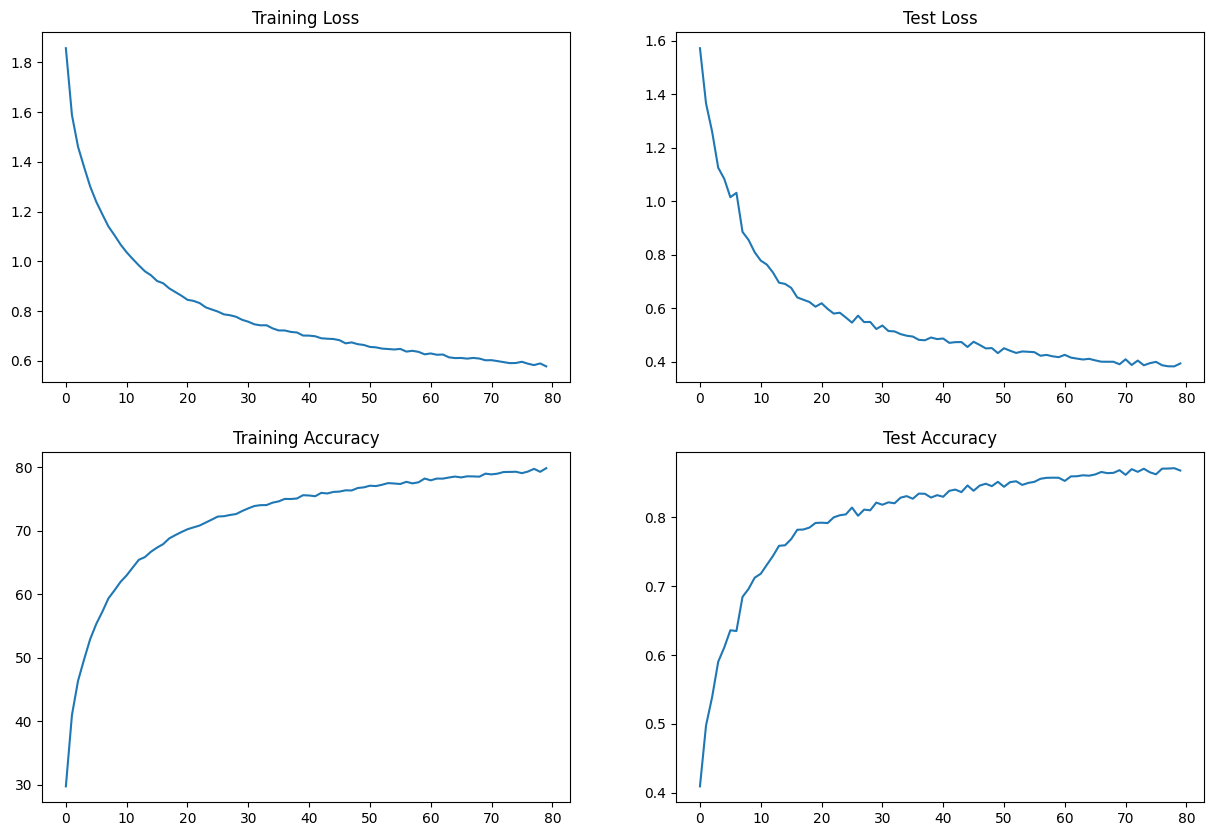

In [6]:
utils.plot_losses(train_losses,train_acc_list,test_losses,test_acc_list)